# Spam message classification 

In [1]:
import numpy as np 
import pandas as pd

In [2]:
dataset = pd.read_csv("SMSSpamCollection-",sep='\t',names= ['label','msg'])

In [3]:
dataset 

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
dataset.isnull().sum()

label    0
msg      0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   msg     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
dataset.describe()

,label,msg
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
dataset['label']= dataset['label'].map({'ham':0,'spam':1})

In [8]:
dataset

,label,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

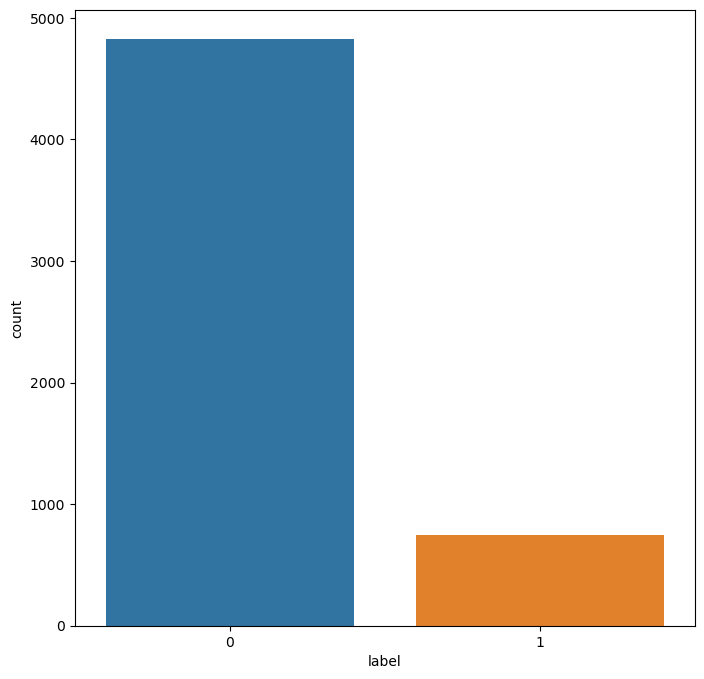

In [10]:
plt.figure(figsize=(8,8))
p = sns.countplot(x="label",data=dataset)

In [11]:
only_spam = dataset[dataset["label"]==1]
len(only_spam)

747

In [12]:
count = int((dataset.shape[0] - only_spam.shape[0])/ only_spam.shape[0]) 

In [13]:
count

6

In [14]:
for i in range (0,count-1):
    dataset = pd.concat([dataset, only_spam])

In [15]:
dataset

,label,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [16]:
dataset = dataset.reset_index()

In [17]:
dataset

,index,label,msg
0,0,0,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,0,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
9302,5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
9303,5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
9304,5547,1,Had your contract mobile 11 Mnths? Latest Moto...
9305,5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [18]:
dataset.drop('index',axis=1)

,label,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
9302,1,Want explicit SEX in 30 secs? Ring 02073162414...
9303,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
9304,1,Had your contract mobile 11 Mnths? Latest Moto...
9305,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [19]:
dataset

,index,label,msg
0,0,0,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,0,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
9302,5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
9303,5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
9304,5547,1,Had your contract mobile 11 Mnths? Latest Moto...
9305,5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [20]:
dataset['word_count'] = dataset['msg'].apply(lambda x : len(x.split()))

In [21]:
dataset

,index,label,msg,word_count
0,0,0,"Go until jurong point, crazy.. Available only ...",20
1,1,0,Ok lar... Joking wif u oni...,6
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,3,0,U dun say so early hor... U c already then say...,11
4,4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...,...
9302,5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
9303,5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
9304,5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
9305,5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


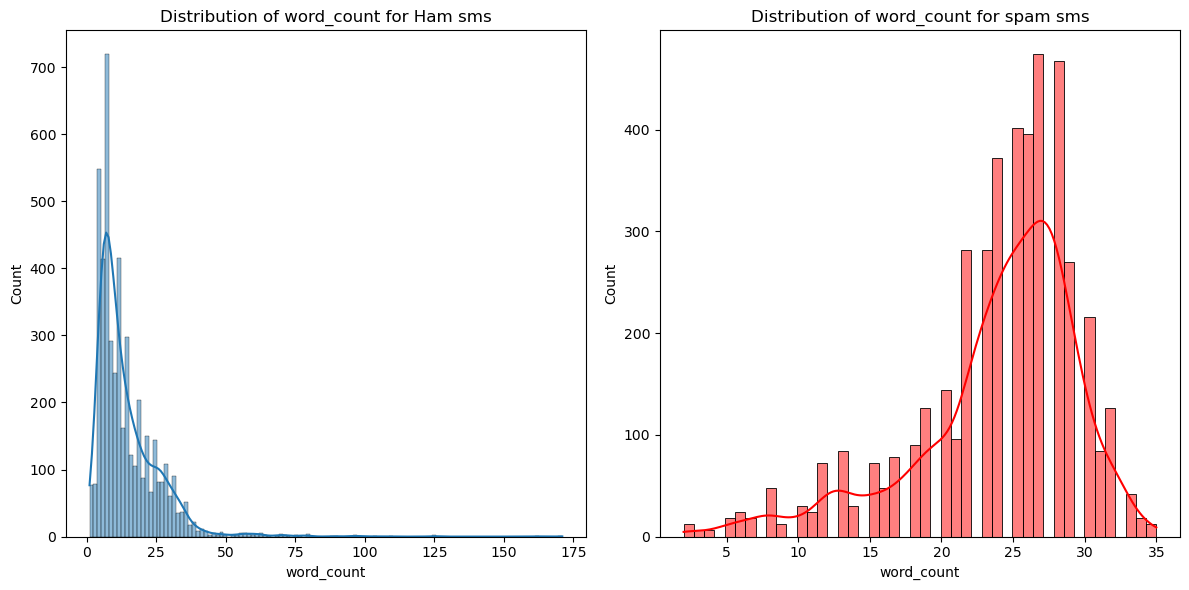

In [22]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset["label"] == 0].word_count, kde = True)
p = plt.title('Distribution of word_count for Ham sms')

plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset["label"] == 1].word_count, color = 'red', kde = True)
p = plt.title('Distribution of word_count for spam sms')

plt.tight_layout()
plt.show()

In [23]:
def currency(data):
    currency_symbols = ['$','€','₹',' ¥','£','元','₩',' ₽']
    for i in currency_symbols:
        if i in data:
            return 1
        return 0

In [24]:
dataset['contains_currency_symbols'] = dataset['msg'].apply(currency)

In [25]:
dataset

,index,label,msg,word_count,contains_currency_symbols
0,0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,1,0,Ok lar... Joking wif u oni...,6,0
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,3,0,U dun say so early hor... U c already then say...,11,0
4,4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...,...
9302,5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
9303,5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,0
9304,5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
9305,5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


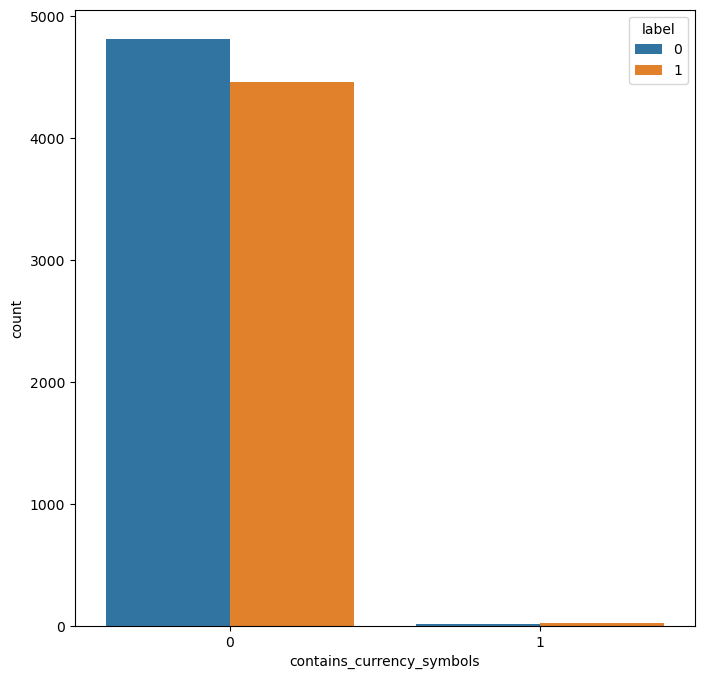

In [26]:
plt.figure(figsize=(8,8))
p = sns.countplot(x = "contains_currency_symbols", data = dataset, hue = 'label')


In [27]:
def number(data):
    for i in data:
        if ord(i)>= 48 and ord(i)<= 57:
            return 1
        return 0

In [28]:
dataset['contains_numbers'] = dataset['msg'].apply(number)

In [29]:
dataset

,index,label,msg,word_count,contains_currency_symbols,contains_numbers
0,0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,1,0,Ok lar... Joking wif u oni...,6,0,0
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,0
3,3,0,U dun say so early hor... U c already then say...,11,0,0
4,4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...,...
9302,5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,0
9303,5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,0,0
9304,5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,0
9305,5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,0


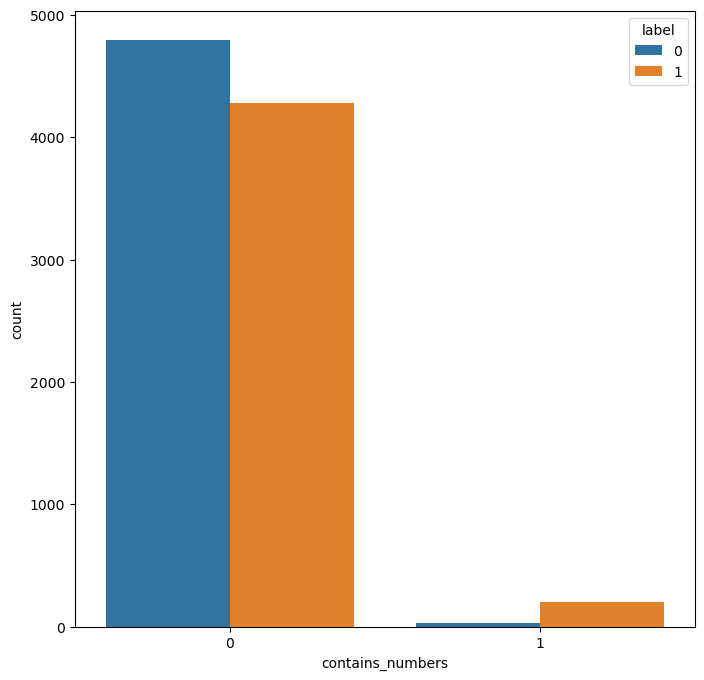

In [30]:
plt.figure(figsize=(8,8))
p = sns.countplot(x = "contains_numbers", data = dataset, hue = 'label')

In [31]:
import nltk
import re
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download the Open Multilingual WordNet resource
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [32]:
corpus = []

wnl = WordNetLemmatizer()

In [33]:
for sms in list(dataset.msg):
    msg = re.sub(pattern = '[^a-zA-Z]', repl = '', string=sms)
    msg = msg.lower()
    words = msg.split()
    lemm_words = [wnl.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    msg = ' '.join(lemm_words)
    
    corpus.append(msg)

In [34]:
corpus

['gountiljurongpointcrazyavailableonlyinbugisngreatworldlaebuffetcinetheregotamorewat',
 'oklarjokingwifuoni',
 'freeentryinawklycomptowinfacupfinaltktsstmaytextfatotoreceiveentryquestionstdtxtratetcsapplyovers',
 'udunsaysoearlyhorucalreadythensay',
 'nahidontthinkhegoestousfhelivesaroundherethough',
 'freemsgheytheredarlingitsbeenweeksnowandnowordbackidlikesomefunyouupforitstilltbokxxxstdchgstosendtorcv',
 'evenmybrotherisnotliketospeakwithmetheytreatmelikeaidspatent',
 'asperyourrequestmellemelleoruminnaminungintenurunguvettamhasbeensetasyourcallertuneforallcallerspresstocopyyourfriendscallertune',
 'winnerasavaluednetworkcustomeryouhavebeenselectedtoreceiveaprizerewardtoclaimcallclaimcodeklvalidhoursonly',
 'hadyourmobilemonthsormoreurentitledtoupdatetothelatestcolourmobileswithcameraforfreecallthemobileupdatecofreeon',
 'imgonnabehomesoonandidontwanttotalkaboutthisstuffanymoretonightkivecriedenoughtoday',
 'sixchancestowincashfromtopoundstxtcshandsendtocostpdaydaystsandcsapplyrepl

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 500)
vectors = tfidf.fit_transform(corpus).toarray()
get_feature_names_out = tfidf.get_feature_names_out()

In [36]:
x = pd.DataFrame(vectors, columns=get_feature_names_out)
y = dataset['label']

In [37]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, x,y, scoring='f1', cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.556
0.007


In [40]:
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)

In [41]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[959,   0],
       [569, 334]], dtype=int64)

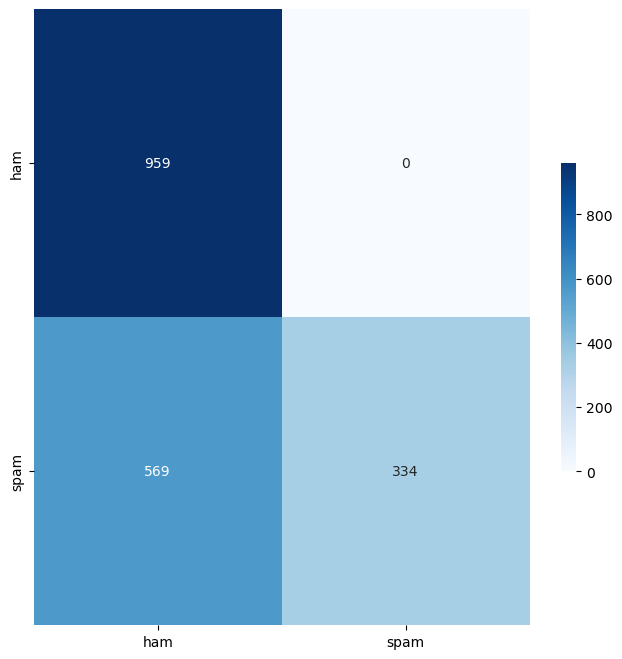

In [42]:
plt.figure(figsize=(8,8))
axis_labels = ['ham','spam']
g = sns.heatmap(data=cm, xticklabels = axis_labels,yticklabels=axis_labels, annot= True, fmt='g',cbar_kws={"shrink":0.5}, cmap="Blues")

In [43]:
def predict_spam(sms):
    message = re.sub(pattern = '[^a-zA-Z]', repl = '', string=sms)
    message = message.lower()
    words = message.split()
    filtered_words = [word for word in words if word not in set (stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    message = ' '.join(lemm_words)
    temp = tfidf.transform([message]).toarray()
    return mnb.predict(temp)

In [44]:
sample_message = 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

if predict_spam(sample_message):
    print('spam message')
else:
    print('ham message')

spam message


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
